## 3 Lab work
## Numerical methods in statistics
Bieliukina Tetiana

The purpose of the work: to derive a formula for classifying the sex of sparrows

We import all necessary libraries for work, read the dataset gorobtsi.txt

In [1]:
library(ggord)
library(MASS)
library(devtools)
library("tidyr")
library(mda)

data<-read.table(file="/Users/tetiana/Documents/Statistics/CompStatMag/gorobtsi.txt",header=T)
head(data)


Loading required package: usethis

Loading required package: class

Loaded mda 0.5-3




,line,sex,age,survival,length,alar,weight,head,humerus,femur,tibiotarsus,skull,keel
,<int>,<chr>,<chr>,<lgl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,m,a,TRUE,154,241,24.5,31.2,0.687,0.668,1.022,0.587,0.830
2,1,m,a,FALSE,165,240,26.5,31.0,0.738,0.704,1.095,0.606,0.847
3,2,m,a,FALSE,160,245,26.1,32.0,0.736,0.709,1.109,0.611,0.842
4,2,m,a,TRUE,160,252,26.9,30.8,0.736,0.709,1.180,0.602,0.841
5,3,m,a,TRUE,155,243,26.9,30.6,0.733,0.704,1.151,0.602,0.846
6,3,m,a,FALSE,161,249,25.6,32.3,0.743,0.718,1.128,0.602,0.828


We can use the summary function to get acquainted with the data.

In [ ]:
summary(data)

      line           sex                age             survival      
 Min.   : 1.00   Length:136         Length:136         Mode :logical  
 1st Qu.:17.75   Class :character   Class :character   FALSE:64       
 Median :34.50   Mode  :character   Mode  :character   TRUE :72       
 Mean   :34.62                                                        
 3rd Qu.:51.25                                                        
 Max.   :72.00                                                        
     length           alar           weight           head      
 Min.   :152.0   Min.   :230.0   Min.   :22.60   Min.   :29.80  
 1st Qu.:157.0   1st Qu.:242.0   1st Qu.:24.57   1st Qu.:31.10  
 Median :160.0   Median :246.0   Median :25.55   Median :31.60  
 Mean   :159.5   Mean   :245.2   Mean   :25.52   Mean   :31.57  
 3rd Qu.:162.0   3rd Qu.:249.0   3rd Qu.:26.50   3rd Qu.:32.02  
 Max.   :167.0   Max.   :256.0   Max.   :31.00   Max.   :33.40  
    humerus           femur         tibiotarsus 

We can notice that the survival column is of boolean type, we can replace it with the values 1 and 0

In [3]:
data$survival <- as.numeric(data$survival)   
head(data)

,line,sex,age,survival,length,alar,weight,head,humerus,femur,tibiotarsus,skull,keel
,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,m,a,1,154,241,24.5,31.2,0.687,0.668,1.022,0.587,0.830
2,1,m,a,0,165,240,26.5,31.0,0.738,0.704,1.095,0.606,0.847
3,2,m,a,0,160,245,26.1,32.0,0.736,0.709,1.109,0.611,0.842
4,2,m,a,1,160,252,26.9,30.8,0.736,0.709,1.180,0.602,0.841
5,3,m,a,1,155,243,26.9,30.6,0.733,0.704,1.151,0.602,0.846
6,3,m,a,0,161,249,25.6,32.3,0.743,0.718,1.128,0.602,0.828


Since the age column only describes the age for dogs, we can remove this column

In [4]:
unique(data$age)

[1] "a" "y" ""

In [5]:
data <- data[-3]
data <- data[-1]

In [6]:
table(data$sex)


 f  m 
49 87 

Unfortunately, the dataset is unbalanced, more observations have been made for savants. If we get bad results in the future, we can use, for example, cross validation to reduce the impact of imbalance.
Let's derive the correlation matrix

In [7]:
cor(data[-1])

,survival,length,alar,weight,head,humerus,femur,tibiotarsus,skull,keel
survival,1.00000000,-0.2498743,0.06758263,-0.2154912,0.06637312,0.1846679,0.1360544,0.1172995,0.03509002,0.1367726
length,-0.24987432,1.0000000,0.69097086,0.5838648,0.46944658,0.4846190,0.4447051,0.3776146,0.43553633,0.5008898
alar,0.06758263,0.6909709,1.00000000,0.5686500,0.49907375,0.6779536,0.5782836,0.5316798,0.43389133,0.5801525
weight,-0.21549117,0.5838648,0.56864998,1.0000000,0.51920877,0.5188943,0.4441451,0.4544589,0.47148457,0.5126353
head,0.06637312,0.4694466,0.49907375,0.5192088,1.00000000,0.6229937,0.6164174,0.5843728,0.53475344,0.4903663
humerus,0.18466786,0.4846190,0.67795361,0.5188943,0.62299365,1.0000000,0.8205803,0.7460385,0.51202258,0.5486094
femur,0.13605439,0.4447051,0.57828357,0.4441451,0.61641736,0.8205803,1.0000000,0.8092996,0.52124802,0.4536862
tibiotarsus,0.11729949,0.3776146,0.53167977,0.4544589,0.58437277,0.7460385,0.8092996,1.0000000,0.45869505,0.3840558
skull,0.03509002,0.4355363,0.43389133,0.4714846,0.53475344,0.5120226,0.5212480,0.4586951,1.00000000,0.3840089
keel,0.13677257,0.5008898,0.58015252,0.5126353,0.49036631,0.5486094,0.4536862,0.3840558,0.38400890,1.0000000


The humerus and femur variables are quite dependent on each other. That is, one variable can be expressed through another. In the future, we can optimize our calculations and use only one of them.

With the help of boxplots, let's see how each indicator differs in females and males

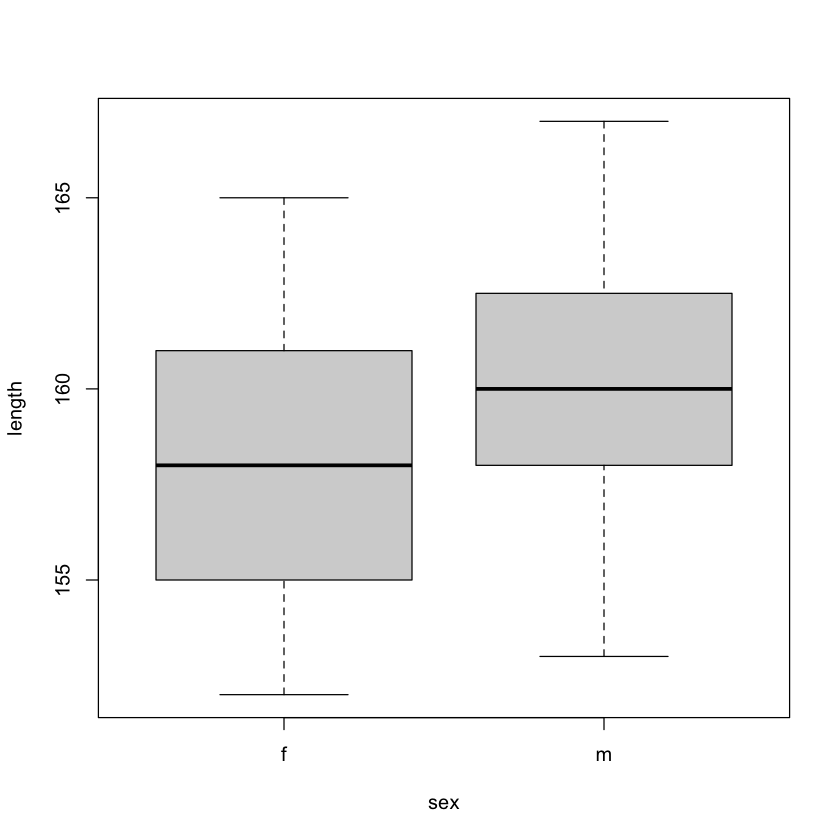

In [8]:
boxplot(length ~ sex, data=data)

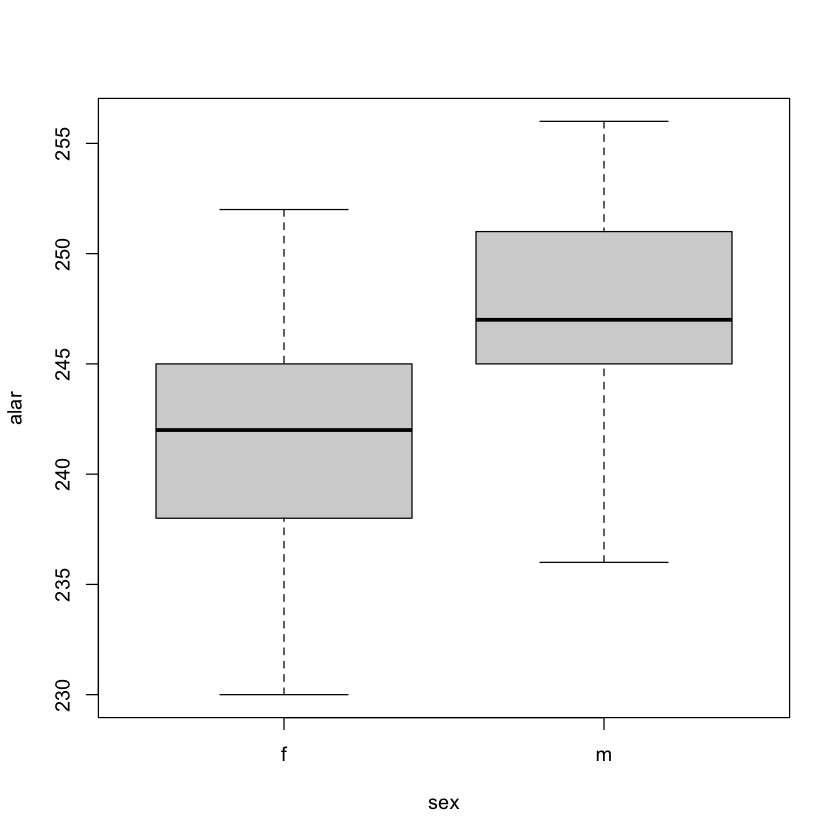

In [9]:
boxplot(alar ~ sex, data=data)

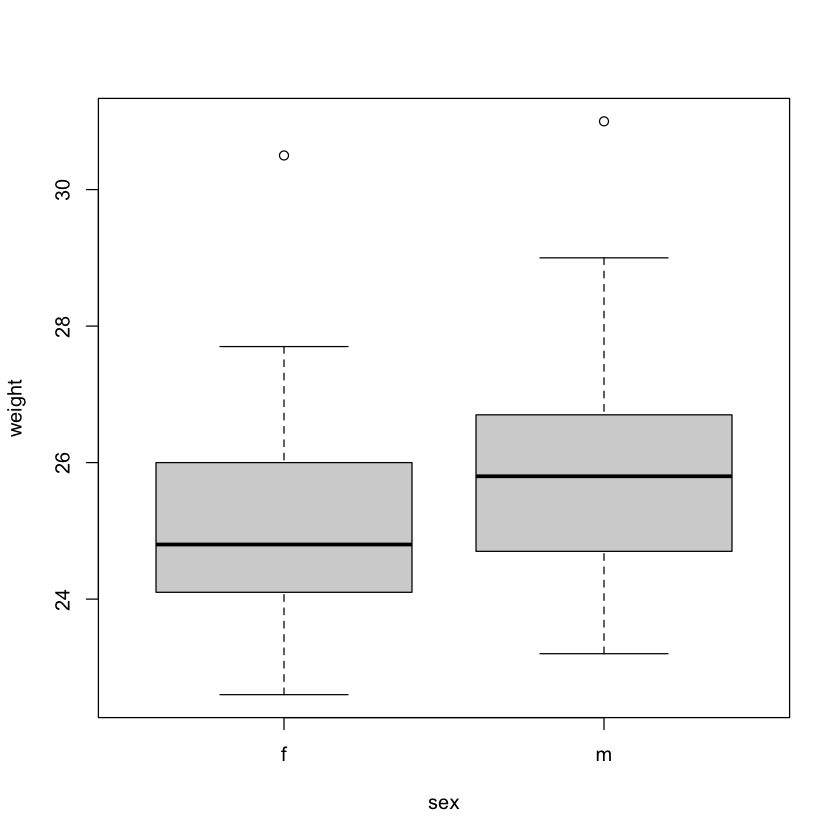

In [10]:
boxplot(weight ~ sex, data=data)

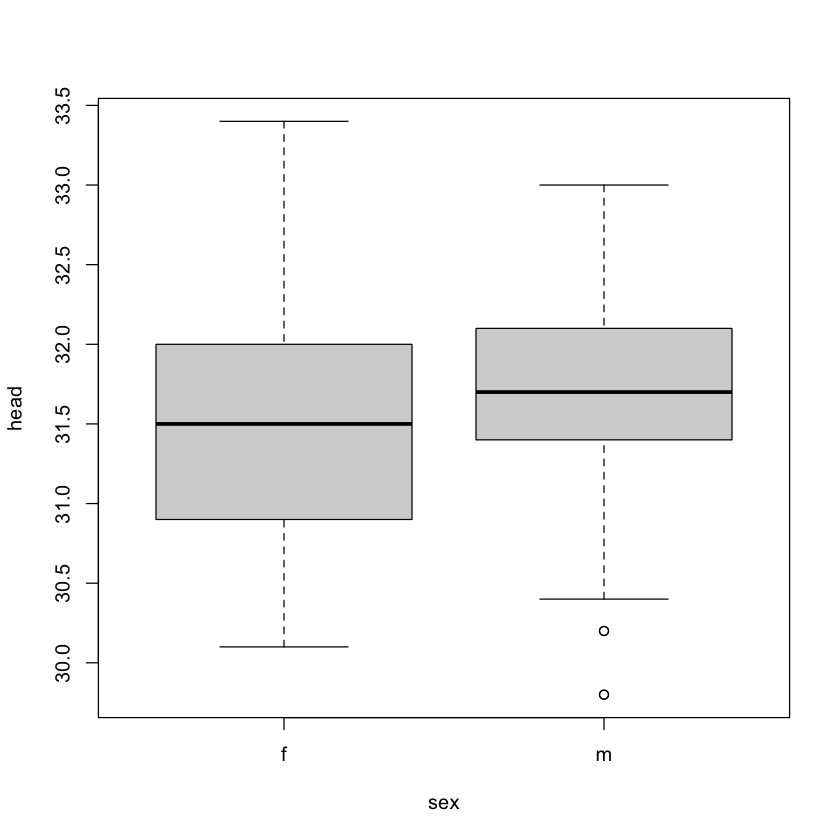

In [11]:
boxplot(head ~ sex, data=data)

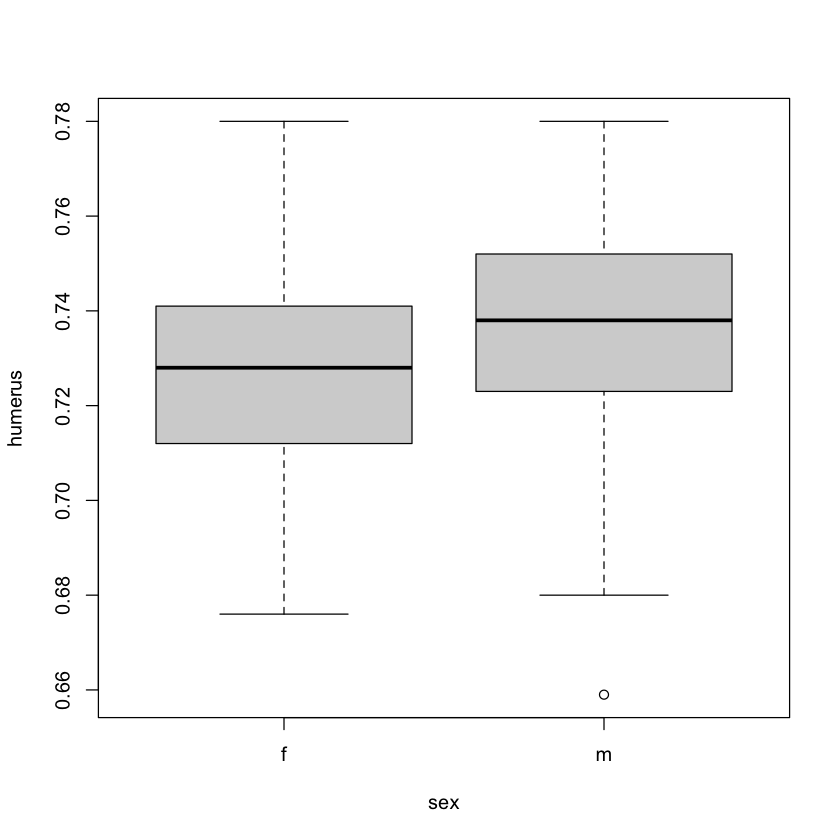

In [12]:
boxplot(humerus ~ sex, data=data)

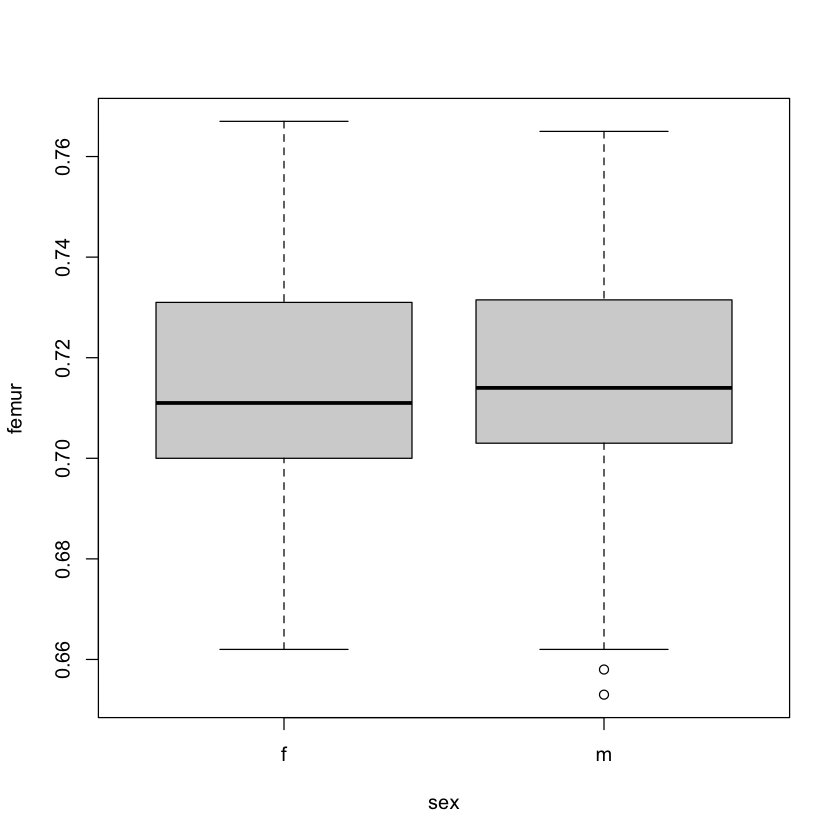

In [13]:
boxplot(femur ~ sex, data=data)

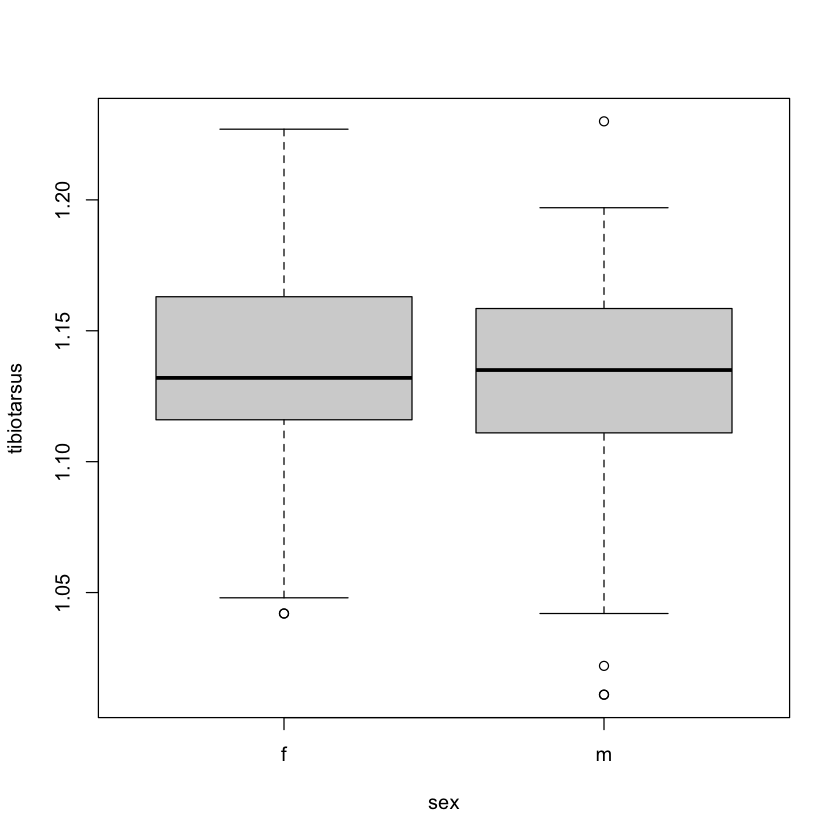

In [14]:
boxplot(tibiotarsus ~ sex, data=data)

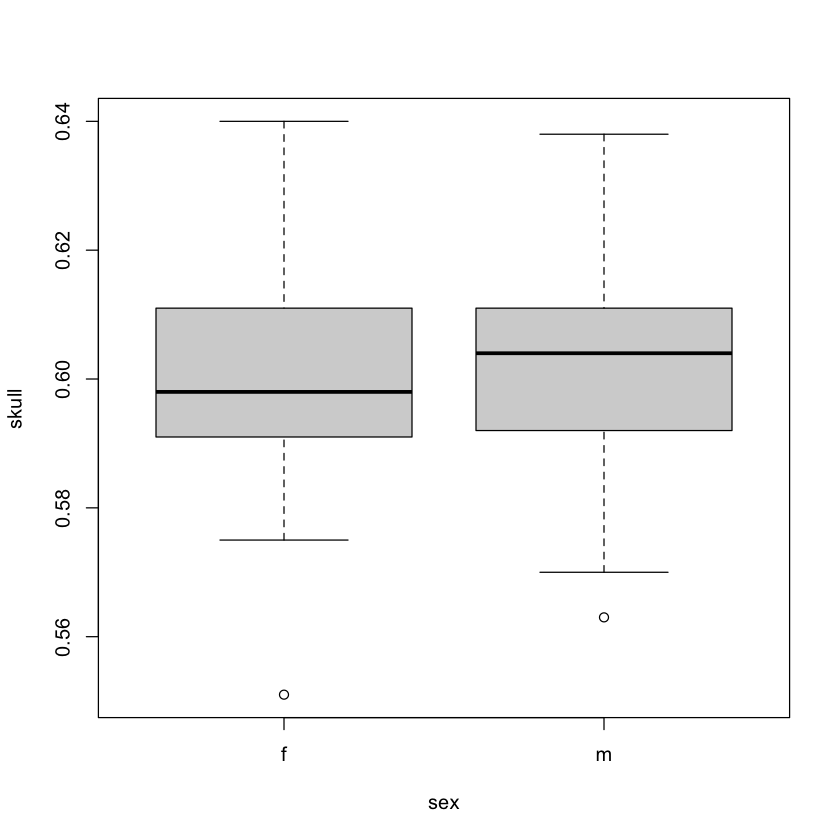

In [15]:
boxplot(skull ~ sex, data=data)

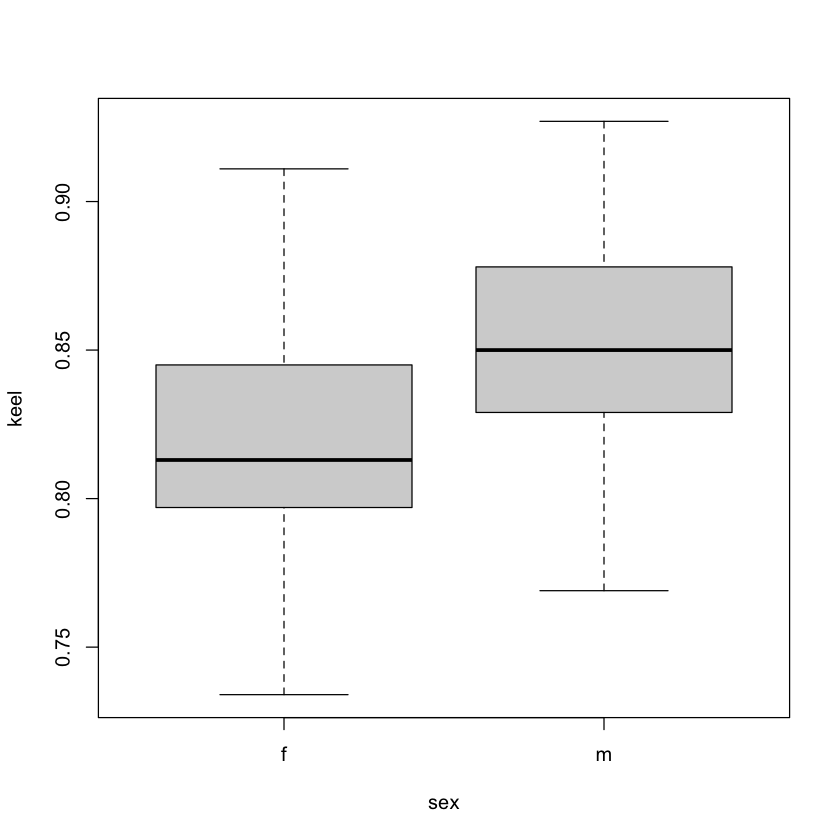

In [16]:
boxplot(keel ~ sex, data=data)

We see that such variables as - skull, tibiotarsus, femur are almost identical for females and males, so we can not use these columns in our classification either. Let's proceed to the discriminant analysis. Let's first divide the dataset into test and training parts (0.3 / 0.7)

In [17]:
set.seed(15)
ind <- sample(2, nrow(iris),
              replace = TRUE,
              prob = c(0.7, 0.3))
training <- data[ind==1,]
testing <- data[ind==2,]
training <- training %>% drop_na()
testing <- testing %>% drop_na()

Let's also get rid of the imbalance in the dataset, let's do it with the most standard method - resampling with return.

In [18]:
females = training[training$sex == 'f',]
indexes_resampl = sample(rownames(females) , size = nrow(training[training$sex == 'm',]), replace=TRUE)
females = females[c(indexes_resampl),]
training = rbind(training[training$sex == 'm',], females) 

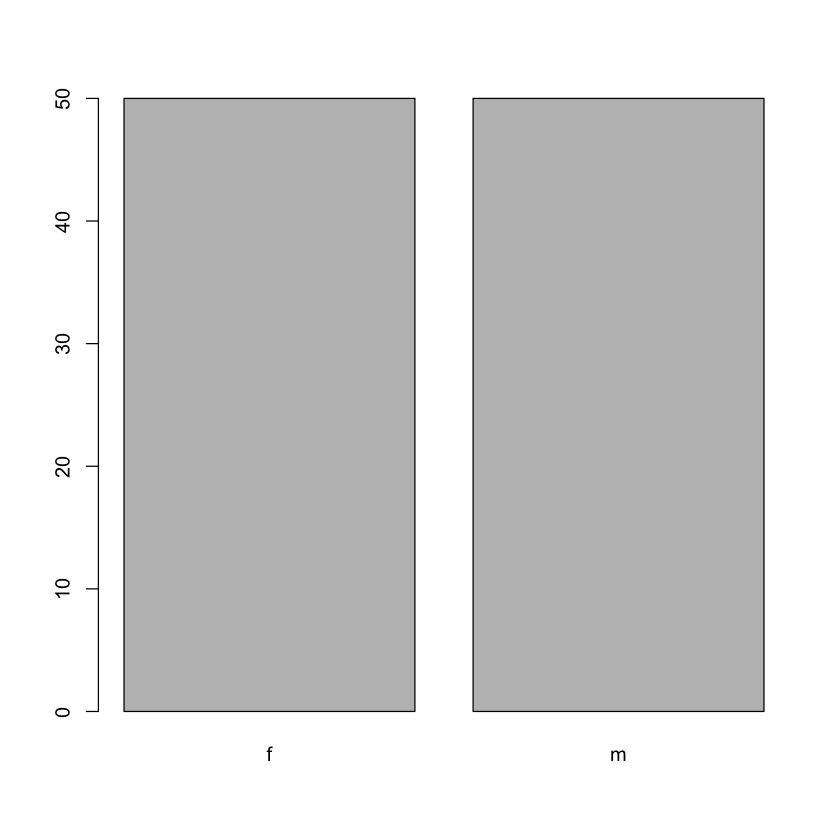

In [19]:
barplot(table(training$sex))

So now we have the same number of records for females and males.

Using the lda function, we perform linear discriminant analysis

In [20]:
linear <- lda(sex~., training)
linear

Call:
lda(sex ~ ., data = training)

Prior probabilities of groups:
  f   m 
0.5 0.5 

Group means:
  survival length   alar weight   head humerus   femur tibiotarsus   skull
f     0.46 158.24 241.52 25.022 31.588 0.72636 0.71060     1.13858 0.59988
m     0.66 160.08 247.40 25.644 31.664 0.73588 0.71514     1.13514 0.60346
     keel
f 0.81216
m 0.85038

Coefficients of linear discriminants:
                     LD1
survival      0.61408642
length       -0.03368088
alar          0.26926476
weight        0.02444667
head         -0.37714267
humerus     -33.17219503
femur        -0.29803378
tibiotarsus -10.39953553
skull         5.99321982
keel         20.23730007

Let's make a histogram for the values of the discriminant function.

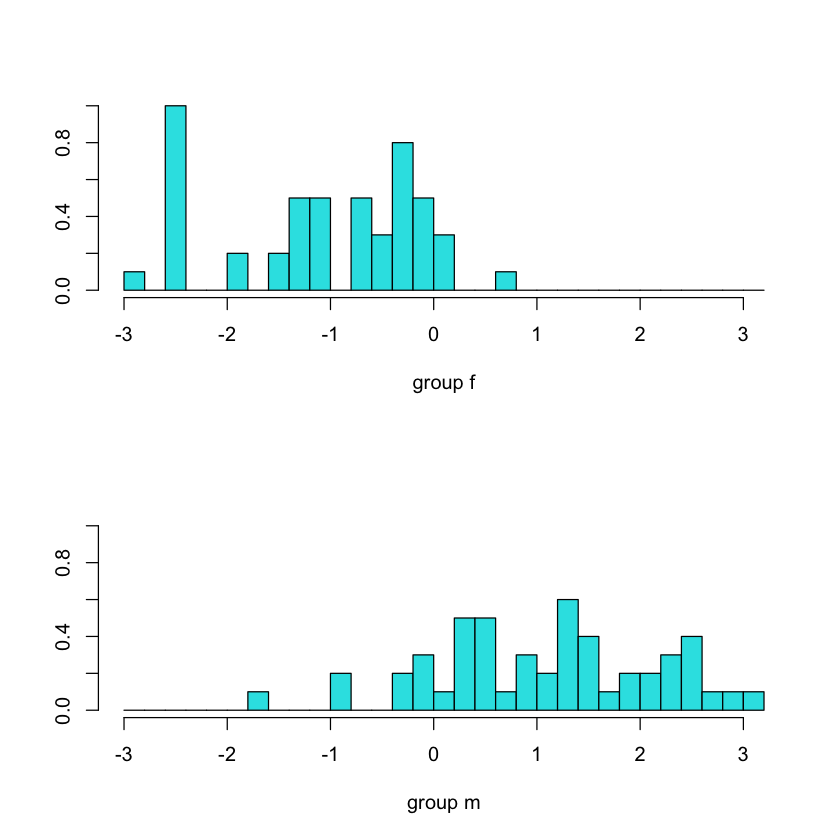

In [21]:
p <- predict(linear, training)
ldahist(data = p$x[,1], g = training$sex)

Unfortunately, our classes overlap, so the classification is not perfect. But this is not surprising, since we saw that all indicators of male and female sparrows are very similar.

Let's look at the matrix of results

In [22]:
p.train <- predict(linear, training)$class
table1 <-  table(predicted = p.train, Actual = training$sex)
table1

         Actual
predicted  f  m
        f 46  8
        m  4 42

On the training dataset, 46 females and 42 males are classified correctly, and 4 females and 8 males are incorrectly classified.
Let's check for a test dataset

In [23]:
p.test <- predict(linear, testing)$class
table2 <- table(predicted = p.test, Actual = testing$sex)
table2

         Actual
predicted  f  m
        f 11  5
        m  4 32

11 females and 32 males are classified correctly, 4 females and 5 males - incorrectly. The results don't seem to be too bad considering the size of the dataset and the strong class similarity. But it is also worth considering that we may have been lucky with the selection of data, in order to learn more precisely the accuracy of the model, we can use cross-validation methods.

In [43]:
cv <- lda(sex ~ ., CV=TRUE, data = training)
table(training$sex, cv$class, dnn = c('Actual Group','Predicted Group'))

            Predicted Group
Actual Group  f  m
           f 41  9
           m  9 41

Now we can be sure that our model performs well under different data samples

Let's write the formula in explicit form for classification

In [24]:
linear$scaling

,LD1
survival,0.61408642
length,-0.03368088
alar,0.26926476
weight,0.02444667
head,-0.37714267
humerus,-33.17219503
femur,-0.29803378
tibiotarsus,-10.39953553
skull,5.99321982
keel,20.23730007


In [25]:
training$LD1 = data.matrix(training[-1])%*%linear$scaling
testing$LD1 = data.matrix(testing[-1])%*%linear$scaling
males_mean = mean(training[training$sex == 'm',]$LD1)
males_prob = linear$prior[2] 

females_mean = mean(training[training$sex == 'f',]$LD1)
females_prob = linear$prior[1] 

treshold = (0.5*males_mean + females_mean*0.5)
treshold

[1] 33.63997

Since the mean values of the indicators for males and females are similar, linear discriminant analysis may give worse results than non-linear. Let's also try quadratic discriminant analysis

In [44]:
set.seed(15)
ind <- sample(2, nrow(iris),
              replace = TRUE,
              prob = c(0.7, 0.3))
training <- data[ind==1,]
testing <- data[ind==2,]
training <- training %>% drop_na()
testing <- testing %>% drop_na()

females = training[training$sex == 'f',]
indexes_resampl = sample(rownames(females) , size = nrow(training[training$sex == 'm',]), replace=TRUE)
females = females[c(indexes_resampl),]
training = rbind(training[training$sex == 'm',], females) 

In [46]:
qda.fit = qda(sex ~ ., data = training)
qda.fit

Call:
qda(sex ~ ., data = training)

Prior probabilities of groups:
  f   m 
0.5 0.5 

Group means:
  survival length   alar weight   head humerus   femur tibiotarsus   skull
f     0.46 158.24 241.52 25.022 31.588 0.72636 0.71060     1.13858 0.59988
m     0.66 160.08 247.40 25.644 31.664 0.73588 0.71514     1.13514 0.60346
     keel
f 0.81216
m 0.85038

In [47]:
p.train <- predict(qda.fit, training)$class
table1 <-  table(predicted = p.train, Actual = training$sex)
table1

         Actual
predicted  f  m
        f 45  3
        m  5 47

In [48]:
p.test <- predict(qda.fit, testing)$class
table2 <- table(predicted = p.test, Actual = testing$sex)
table2

         Actual
predicted  f  m
        f  6  3
        m  9 34

Cross-validation for quadratic discriminant analysis:

In [49]:
cv_quad = qda(sex ~ ., data = training, CV=TRUE)
table(training$sex, cv_quad$class, dnn = c('Actual Group','Predicted Group'))

            Predicted Group
Actual Group  f  m
           f 38 12
           m  5 45

Although the training data gives a slightly better result in the quadratic discriminant analysis, it is worth noting that in the test we got a very large error for females, that is, overtraining took place. So, we leave the linear approach. Let's write down the formula for gender classification.
Let the vector v = (v1, v2, .., v10) - a set of features for a certain sparrow, ld - a vector obtained during linear discriminant analysis, that is, a vector on which we will project points from 10-dimensional space, then the projection: $proec_v = v1*ld1 + ... + v10*ld10$.Threshold for classification: $treshold = 0.5*(m1 + m2)$,where m1 is the mean value of males on ld, and m2 is the mean value of females on ld. 1 - male, 0 - female $f = \begin{cases} 1, & proec_v > treshold \\ 0, & proec_v < treshold  \end{cases}$ Specifically for our case ld = (0.61408642,
-0.03368088,
0.26926476,
0.02444667,
-0.37714267,
-33.17219503,
-0.29803378,
-10.39953553,
5.99321982,
20.23730007), a treshold = 33.6399679291373
